# Create Intermediate Raster Result

In [1]:
from datetime import datetime

import geoengine as ge
from geoengine import StoredDataset
from geoengine.colorizer import Colorizer

## Initialize Geo Engine

In [2]:
ge.initialize("http://localhost:3030")

In [3]:
session = ge.get_session()
session

Server:              http://localhost:3030
Session Id:          d2bd0d89-8a23-40e4-b548-204f5eee6279
Session valid until: 2022-12-02T15:48:06.575Z

## Define workflow of MODIS NDVI raster

In [4]:
workflow = ge.register_workflow({
                "type": "Raster",
                "operator": {
                    "type": "GdalSource",
                    "params": {
                        "data": {
                            "type": "internal",
                            "datasetId": "36574dc3-560a-4b09-9d22-d5945f2b8093"
                        }
                    }
                }
            })
workflow

c7b7c5c8-ee11-5418-bd1f-9e5889f6e04a

## Query raster via WMS

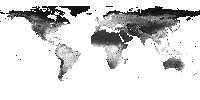

In [5]:

time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        [-180.0, -90.0, 180.0, 90.0],
        [time, time],
        resolution=(1.8, 1.8)
        ),
    Colorizer(map_name="gray", min_max=(0, 255))
)

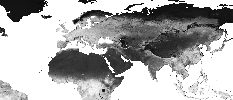

In [6]:
workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        [-60.0, -10.0, 150.0, 80.0],
        [time, time],
        resolution=(0.9, 0.9)
        ),
        Colorizer(map_name="gray", min_max=(0, 255))
)

## Store part of the world as new dataset

In [7]:
start_time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")
end_time = datetime.strptime(
    '2014-06-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")
task = workflow.save_as_dataset(
    ge.QueryRectangle(
        [-60.0, -10.0, 150.0, 80.0],
        [start_time, end_time],
        resolution=(0.9, 0.9)
        ),
    "Part NDVI",
    "Test Description",
)
task

UUID('7c0c503a-617e-4573-8a29-9bc90d6085cc')

In [8]:
task_status_info = task.wait_for_finish_and_print_status(1)
task_status_info

status=running, pct_complete=0.00%, time_estimate=? (± ?), info=None
status=completed, info={'dataset': '1d280c92-5f6d-4fab-a532-62367574e170', 'upload': '593fd053-39e0-41db-94d2-218750b681d5'}, time_total=00:00:00


TaskStatusInfo(status='completed', info={'dataset': '1d280c92-5f6d-4fab-a532-62367574e170', 'upload': '593fd053-39e0-41db-94d2-218750b681d5'}, time_total='00:00:00')

In [9]:
stored_dataset = StoredDataset.from_response(task_status_info.info)
stored_dataset

StoredDataset(dataset_id=1d280c92-5f6d-4fab-a532-62367574e170, upload_id=593fd053-39e0-41db-94d2-218750b681d5)

In [10]:
new_workflow = ge.register_workflow({
                "type": "Raster",
                "operator": {
                    "type": "GdalSource",
                    "params": {
                        "data": {
                            "type": "internal",
                            "datasetId": str(stored_dataset.dataset_id)
                        }
                    }
                }
            })
new_workflow

e75769ed-f349-5f63-8803-8905e201a54d

## WMS request from new dataset

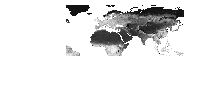

In [11]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        [-180.0, -90.0, 180.0, 90.0],
        [time, time],
        resolution=(1.8, 1.8)
        ),
    Colorizer(map_name="gray", min_max=(0, 255))
)

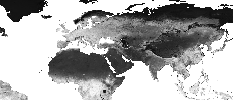

In [12]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        [-60.0, -10.0, 150.0, 80.0],
        [time, time],
        resolution=(0.9, 0.9)
        ),
    Colorizer(map_name="gray", min_max=(0, 255))
)

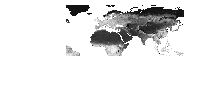

In [13]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        [-180.0, -90.0, 180.0, 90.0],
        [time, time],
        resolution=(1.8, 1.8)
        ),
    Colorizer(map_name="gray", min_max=(0, 255))
)

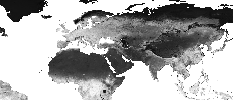

In [14]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        [-60.0, -10.0, 150.0, 80.0],
        [time, time],
        resolution=(0.9, 0.9)
        ),
    Colorizer(map_name="gray", min_max=(0, 255))
)

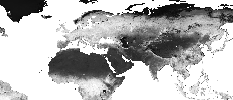

In [15]:
time = datetime.strptime(
    '2014-05-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

new_workflow.wms_get_map_as_image(
    ge.QueryRectangle(
        [-60.0, -10.0, 150.0, 80.0],
        [time, time],
        resolution=(0.9, 0.9)
        ),
    Colorizer(map_name="gray", min_max=(0, 255))
)